In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [7]:
df = pd.read_excel('Medicine_description.xlsx')
df.head()

,Drug_Name,Reason,Description
0,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


Dataset has 22479 unique groups
********************
And the top 10 counts are :
M Cold Plus CZ Tablet 10'S                              2
Gefer Capsule 10'S                                      2
A CN Gel(Topical) 20gmA CN Soap 75gm                    1
Doloban SR 100mg Tablet 10'S                            1
Dolochek 200mg Tablet 10'SDolochek 100mg Tablet 10'S    1
Dolocam 20mg Tablet 10'S                                1
Dolobest SR 200mg Tablet 10'S                           1
Dolobest SP Tablet 10'S                                 1
Dolobest P Tablet 10'S                                  1
Dolobest OD 200mg Tablet 10'S                           1
Name: Drug_Name, dtype: int64
********************


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, "M Cold Plus CZ Tablet 10'S"),
  Text(1, 0, "Gefer Capsule 10'S"),
  Text(2, 0, 'A CN Gel(Topical) 20gmA CN Soap 75gm'),
  Text(3, 0, "Doloban SR 100mg Tablet 10'S"),
  Text(4, 0, "Dolochek 200mg Tablet 10'SDolochek 100mg Tablet 10'S"),
  Text(5, 0, "Dolocam 20mg Tablet 10'S"),
  Text(6, 0, "Dolobest SR 200mg Tablet 10'S"),
  Text(7, 0, "Dolobest SP Tablet 10'S"),
  Text(8, 0, "Dolobest P Tablet 10'S"),
  Text(9, 0, "Dolobest OD 200mg Tablet 10'S")])

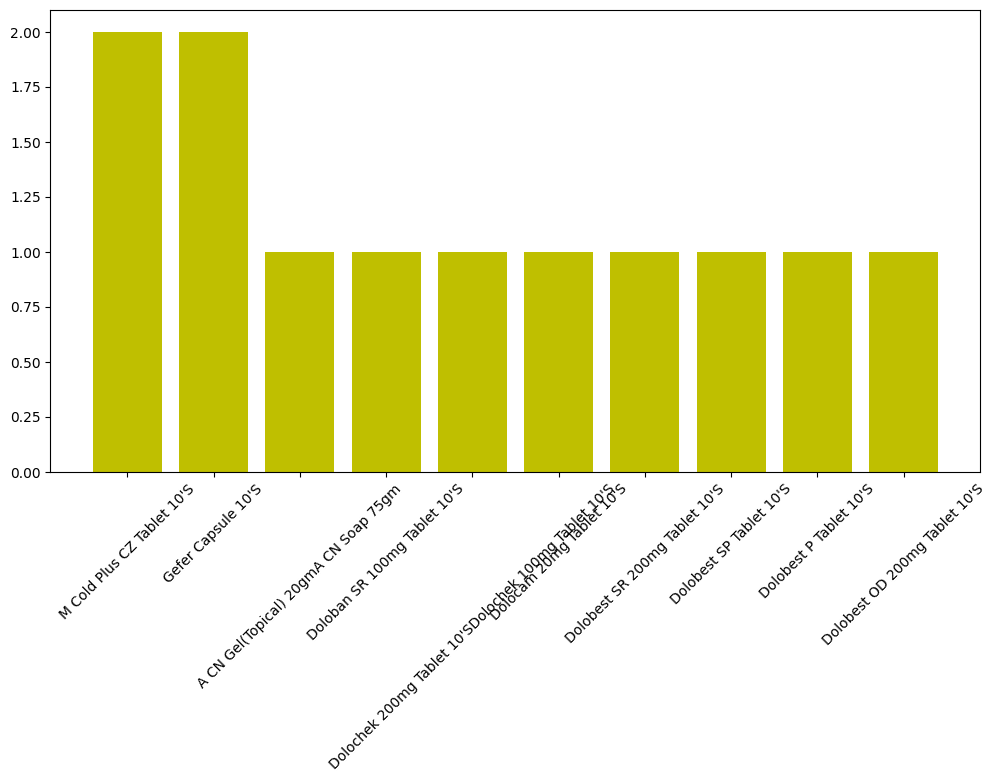

In [8]:
print(f'Dataset has {len(df.Drug_Name.unique())} unique groups')
print('*'*20)
print(f'And the top 10 counts are :')
print(df.Drug_Name.value_counts().head(10))
print('*'*20)

c = df.Drug_Name.value_counts().head(10)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(c.index, c.values, width=0.8, color='y')
plt.xticks(rotation=45)

Dataset has 51 unique groups
********************
And the top 10 counts are :
Supplement      3913
Pain            2852
Infection       2629
Hypertension    2505
Diabetes        2013
Fungal           878
Allergies        865
Depression       628
Anxiety          502
Anaemia          490
Name: Reason, dtype: int64
********************


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Supplement'),
  Text(1, 0, 'Pain'),
  Text(2, 0, 'Infection'),
  Text(3, 0, 'Hypertension'),
  Text(4, 0, 'Diabetes'),
  Text(5, 0, 'Fungal'),
  Text(6, 0, 'Allergies'),
  Text(7, 0, 'Depression'),
  Text(8, 0, 'Anxiety'),
  Text(9, 0, 'Anaemia')])

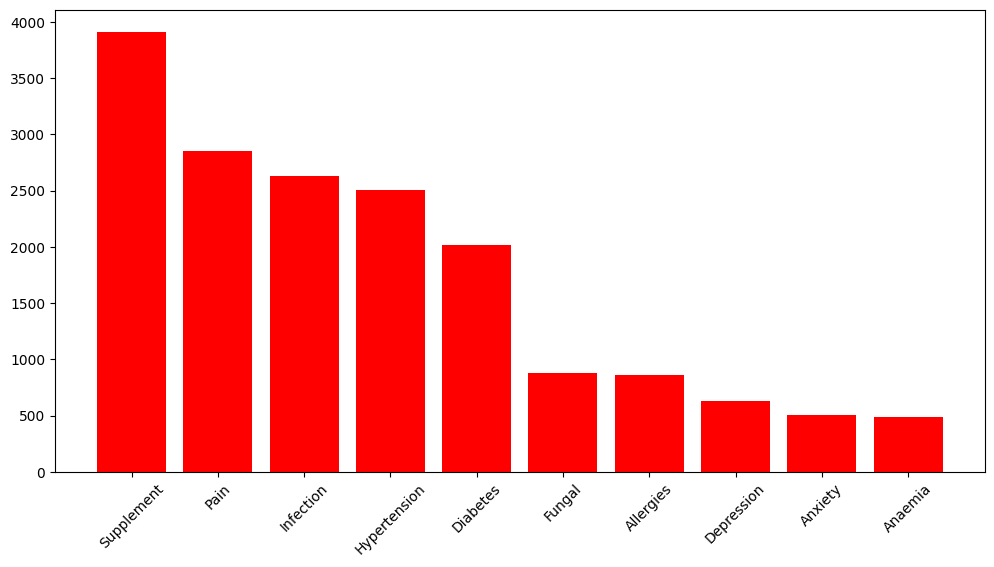

In [10]:
print(f'Dataset has {len(df.Reason.unique())} unique groups')
print('*'*20)
print(f'And the top 10 counts are :')
print(df.Reason.value_counts().head(10))
print('*'*20)

c = df.Reason.value_counts().head(10)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(c.index, c.values, width=0.8, color='r')
plt.xticks(rotation=45)

Dataset has 301 unique names
********************
And the top 10 counts are :
treat type 2 diabetes mellitus when diet, physical exercise and weight reduction alone have not been able to control your blood sugar levels    671
reduces the diabetes                                                                                                                            671
reduces sugar level diabetes                                                                                                                    671
lower chance of stroke in patients with high blood pressure and a heart problem called left ventricular hypertrophy (LVH)                       578
lower high blood pressure (hypertension)                                                                                                        578
improves immunity                                                                                                                               493
urinary tract and kidneys         

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'treat type 2 diabetes mellitus when diet, physical exercise and weight reduction alone have not been able to control your blood sugar levels'),
  Text(1, 0, 'reduces the diabetes'),
  Text(2, 0, 'reduces sugar level diabetes'),
  Text(3, 0, 'lower\xa0chance of stroke in patients with high blood pressure and a heart problem called left ventricular hypertrophy (LVH)'),
  Text(4, 0, 'lower high blood pressure (hypertension)'),
  Text(5, 0, 'improves immunity'),
  Text(6, 0, 'urinary\xa0tract and kidneys'),
  Text(7, 0, 'infection during surgery'),
  Text(8, 0, 'infection \xa0of the chest in adults with chronic bronchitis'),
  Text(9, 0, 'used for treating high blood pressure (essential hypertension) in adults')])

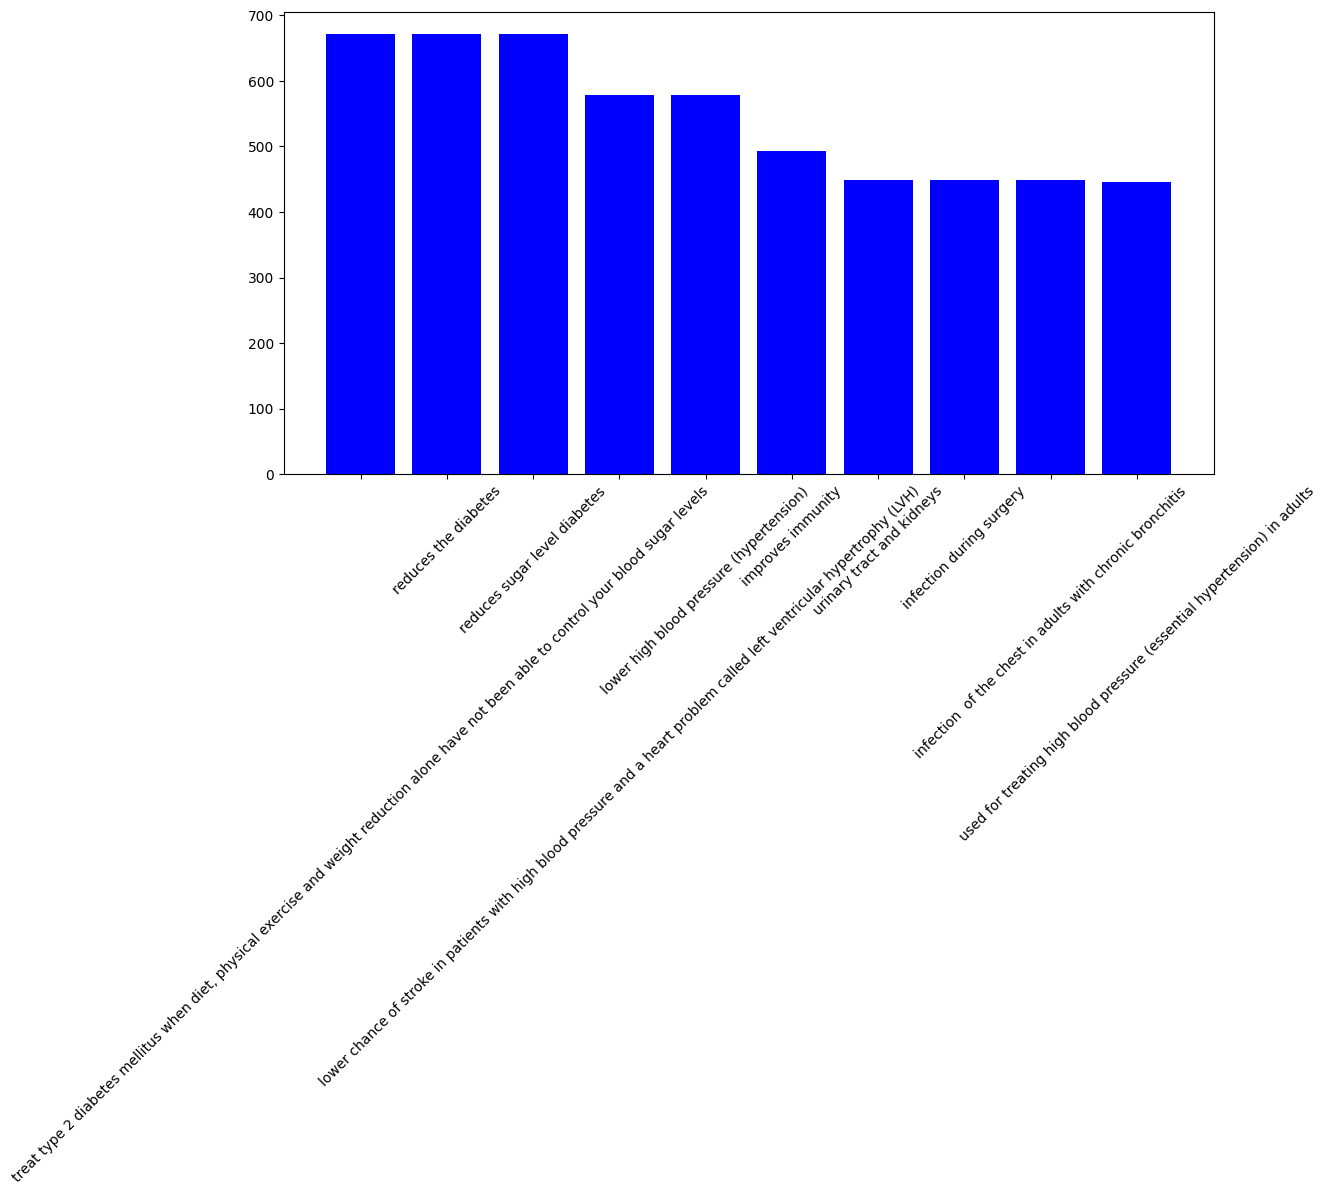

In [9]:
print(f'Dataset has {len(df.Description.unique())} unique names')
print('*'*20)
print(f'And the top 10 counts are :')
print(df.Description.value_counts().head(10))
print('*'*20)

c = df.Description.value_counts().head(10)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(c.index, c.values, width=0.8, color='b')
plt.xticks(rotation=45)

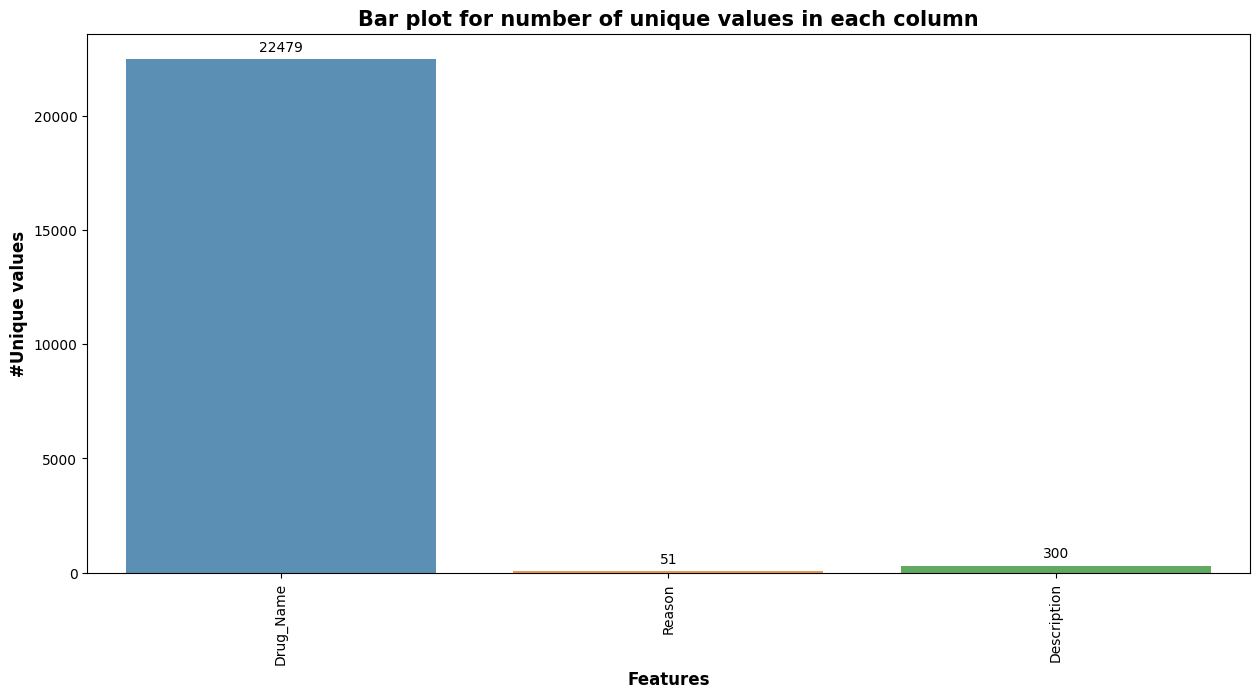

In [11]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [13]:
df1 = pd.read_excel('Ratings.xlsx')
df1.head()

,Short-form,Rating
0,S,4.8
1,R,4.7
2,D,4.5
3,C,4.3
4,B,4.1


In [16]:
df2 = pd.read_excel('Company_Name.xlsx')
df2.head()

,S.No,Company_Name,NSE_Symbol,Rating,Industry
0,1,Sun Pharmaceutical Industries Ltd.,SUNPHARMA,S,Pharmaceuticals & Drugs
1,2,Dr. Reddys Laboratories Ltd.,DRREDDY,R,Pharmaceuticals & Drugs
2,3,Divis Laboratories Ltd.,DIVISLAB,D,Pharmaceuticals & Drugs
3,4,Cipla Ltd.,CIPLA,C,Pharmaceuticals & Drugs
4,5,Biocon Ltd.,BIOCON,B,Pharmaceuticals & Drugs


In [17]:
df2.columns.tolist()


['S.No', 'Company_Name', 'NSE_Symbol', 'Rating', 'Industry']

In [19]:
s = (df2.isna().sum()/df2.shape[0]*100)<50
df2_modified = df2[s.index[s].tolist()]
print (df2_modified.shape)
df2_modified.head()

(22481, 5)


,S.No,Company_Name,NSE_Symbol,Rating,Industry
0,1,Sun Pharmaceutical Industries Ltd.,SUNPHARMA,S,Pharmaceuticals & Drugs
1,2,Dr. Reddys Laboratories Ltd.,DRREDDY,R,Pharmaceuticals & Drugs
2,3,Divis Laboratories Ltd.,DIVISLAB,D,Pharmaceuticals & Drugs
3,4,Cipla Ltd.,CIPLA,C,Pharmaceuticals & Drugs
4,5,Biocon Ltd.,BIOCON,B,Pharmaceuticals & Drugs


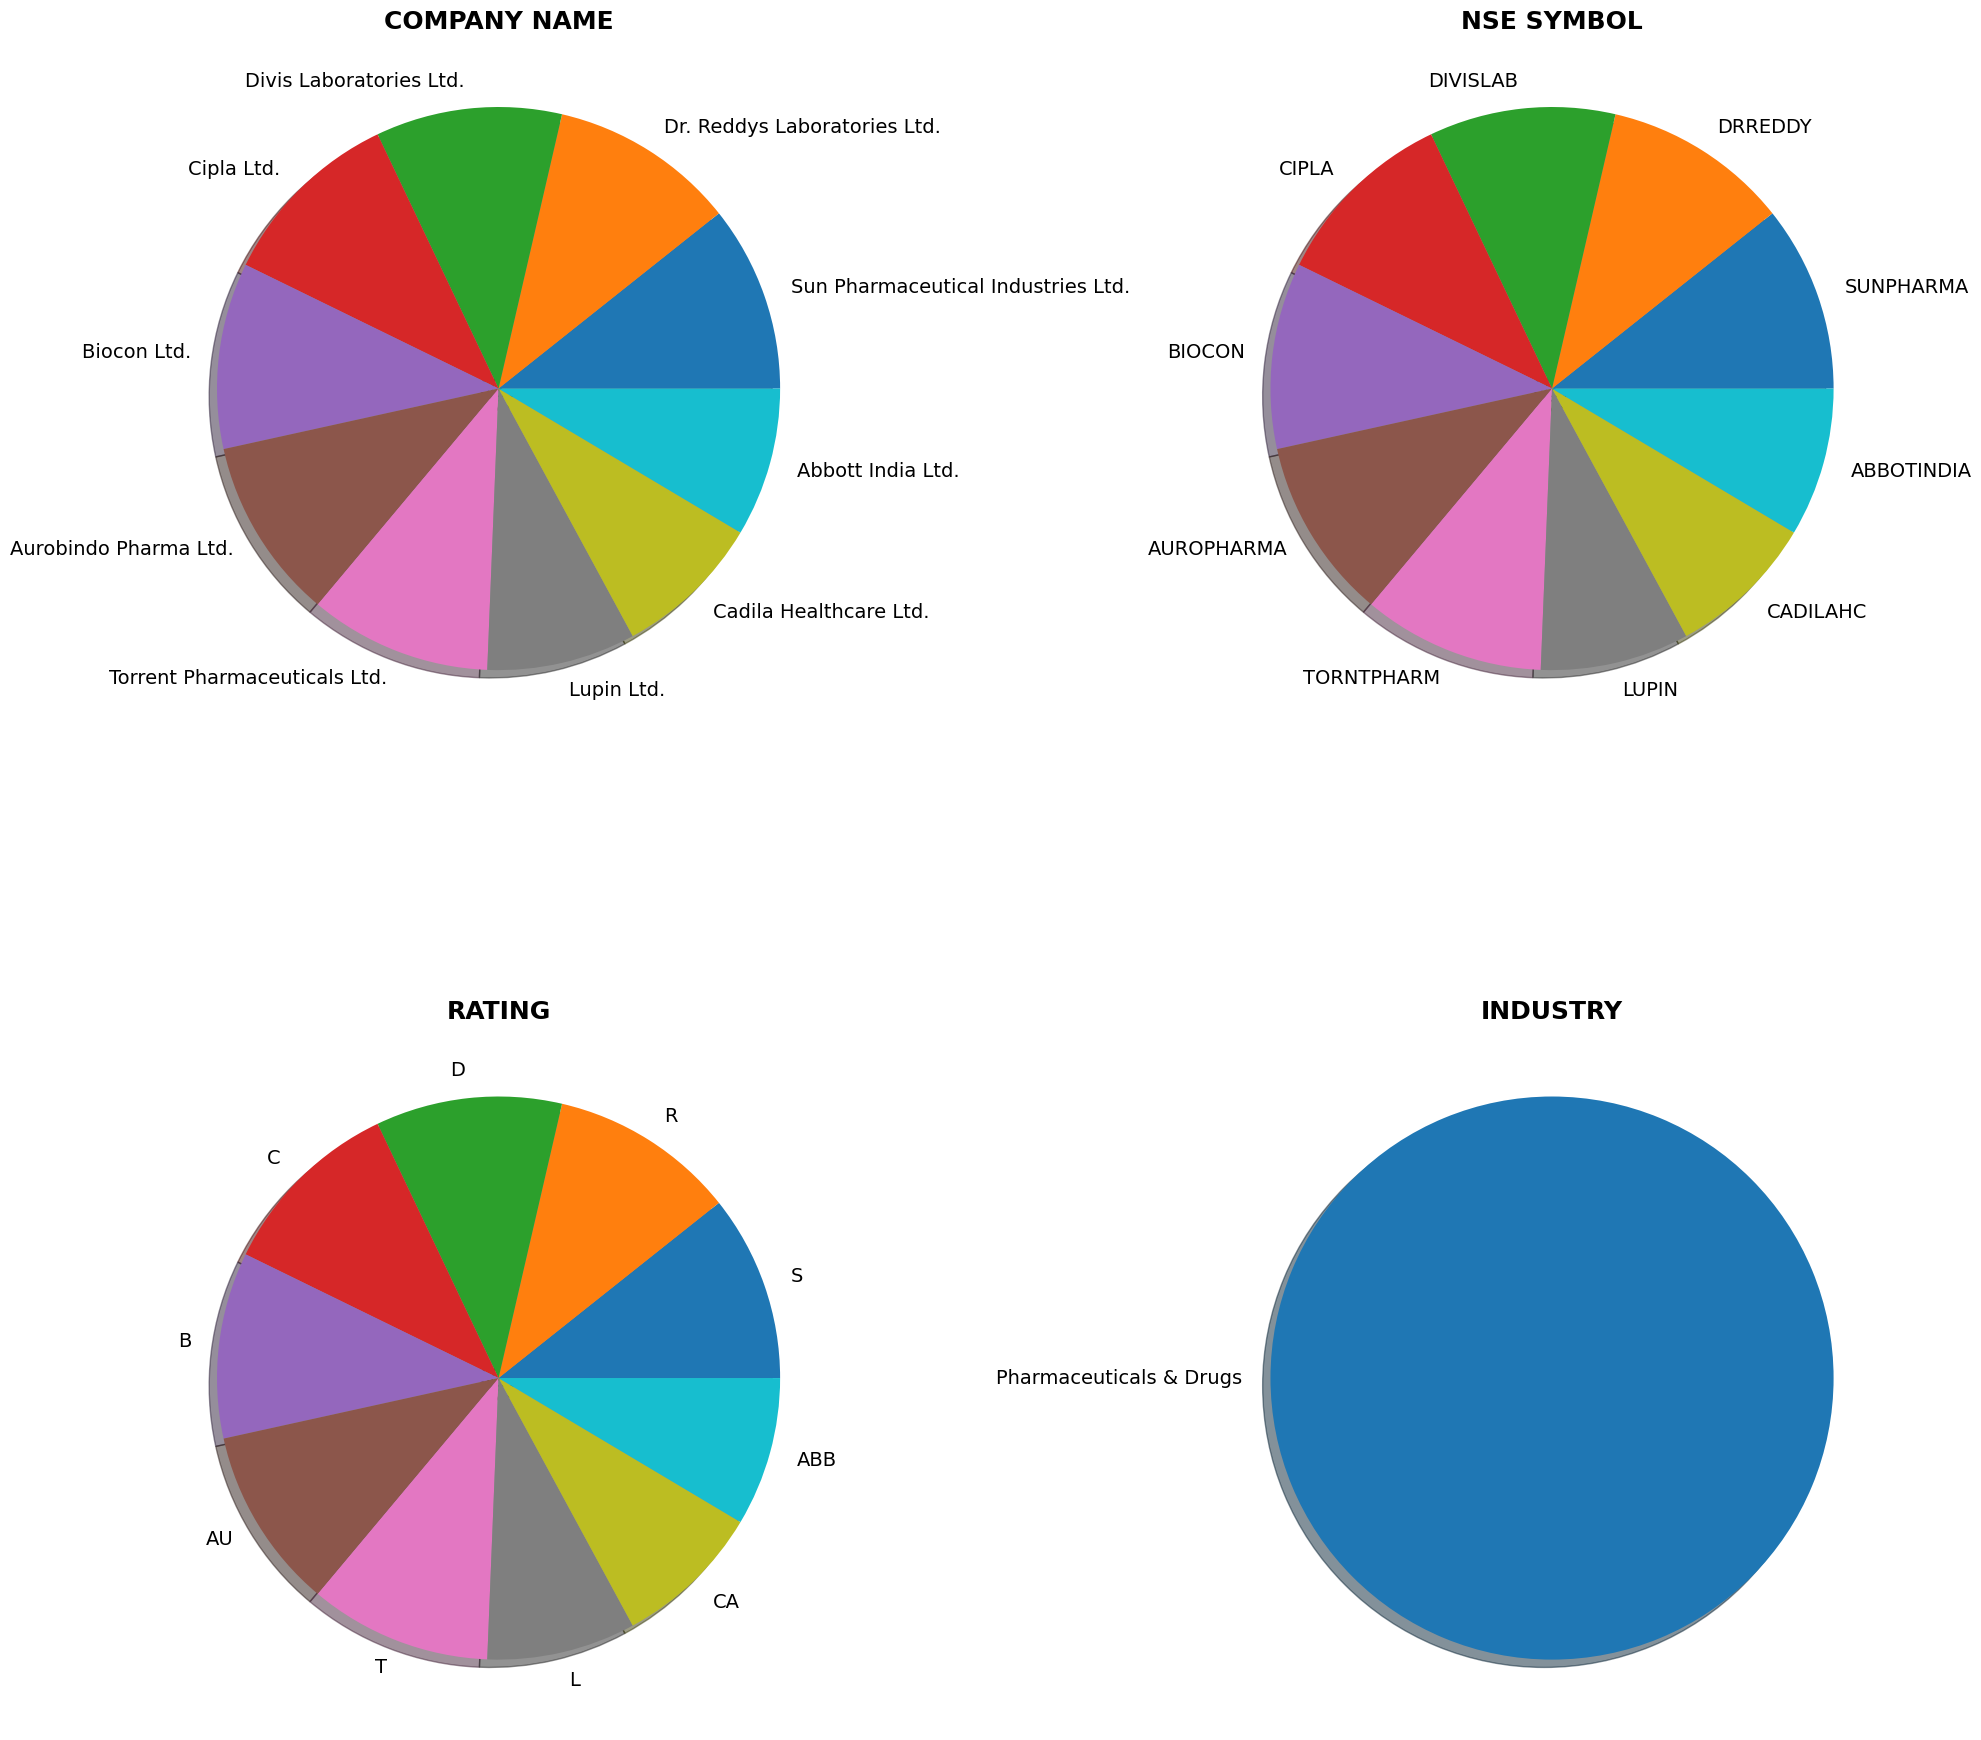

In [20]:
plt.rcParams['font.size'] = 14
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for col, ax in zip(['Company_Name','NSE_Symbol','Rating', 'Industry'], ax.flat):
    dict_ = df2_modified[col].value_counts().head(10).to_dict()
    if ('Not Available' in dict_.keys()):
        dict_.pop('Not Available')
    labels = []
    for i in dict_.keys():
        i = i.split(' ')
        if (len(i) > 6):
            i[math.ceil(len(i)/2)-1] += '\n'
            labels.append(' '.join(i))
        else:
            labels.append(' '.join(i))
    ax.pie(x=list(dict_.values()), labels=labels, shadow=True, startangle=0)
    
    col = (' '.join(col.split('_'))).upper()
    ax.set_title(col, weight='bold', fontsize=18)
plt.tight_layout()
plt.show()